In [1]:
#Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [5]:
#Sample historical stock price data
df = pd.read_csv('stock_prices_500.csv')
df.head()

,Date,Close
0,2022-01-01,100.993428
1,2022-01-02,100.716900
2,2022-01-03,102.012277
3,2022-01-04,105.058336
4,2022-01-05,104.590030


In [ ]:
#Converting date into timestamp
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(pd.Timestamp.toordinal)

In [ ]:
#Initializing Input and Output Variables
X = df[['Date']]
y = df['Close']

#Spliting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2,random_state=42)

In [ ]:
#Initializing and training model on training data
model = LinearRegression()
model.fit(X_train,y_train)

#Making Predictions by model
y_pred = model.predict(X_test)

In [ ]:
#Mean Squared Error and R2 Score
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean Squared Error: {mse:.2f}\nR2 Score: {r2:.2f}")

Mean Squared Error: 80.16
R2 Score: 0.60


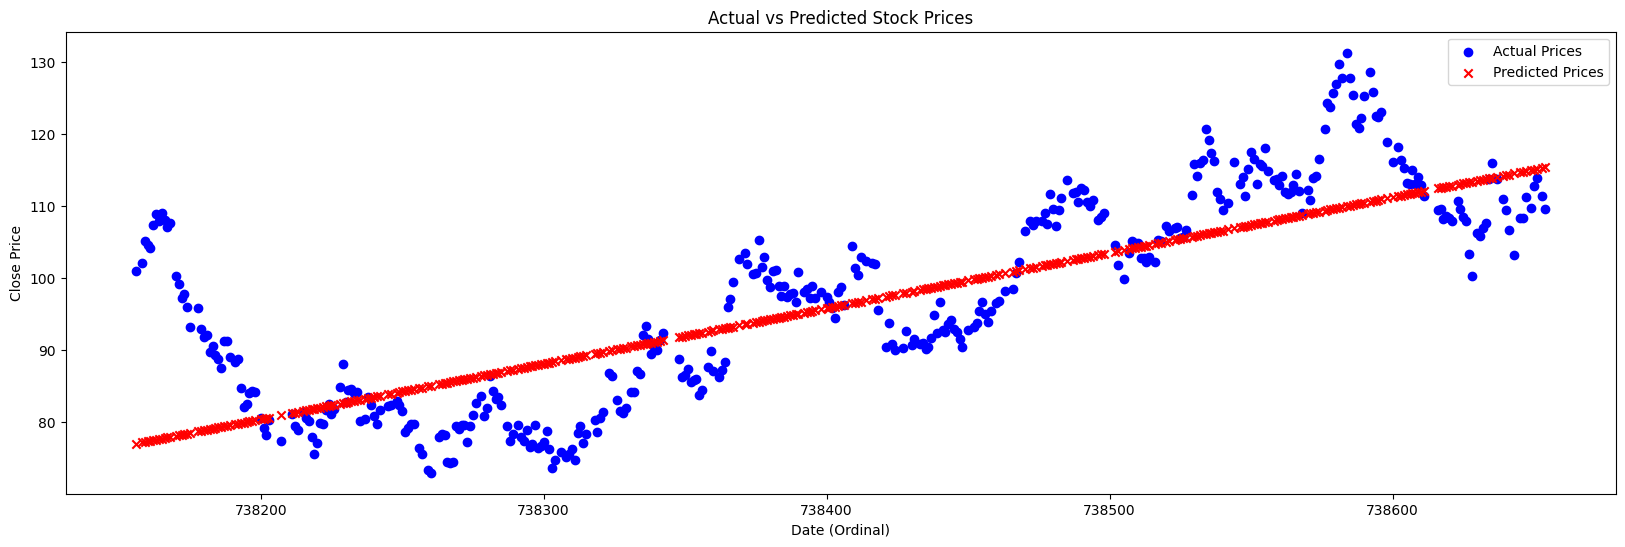

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(20,6))
plt.scatter(X_test, y_test, label="Actual Prices", color="blue", marker="o")
plt.scatter(X_test, y_pred, label="Predicted Prices", color="red", marker="x")
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Date (Ordinal)")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [ ]:
#Function to predict the stock price on the enetered date
def future_price_prediction(date):
    future_date = pd.to_datetime(date).toordinal()
    future_df = pd.DataFrame({'Date': [future_date]})
    predicted_price = model.predict(future_df)
    return predicted_price[0]

#Input date Entered by the user
input_date = input("Enter the date in the format YYYY-MM-DD: ")
predicted = future_price_prediction(input_date)
print(f"Predicted Close Price for {input_date}: ${predicted:.2f}")

Predicted Close Price for 2024-11-12: $157.58
